#### H2O AutoML

    https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html

In [1]:
import pandas as pd
import h2o
from h2o.automl import H2OAutoML

In [2]:
h2o.init(
    nthreads=-1,     # number of threads when launching a new H2O server
    max_mem_size=12  # in gigabytes
)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.291-b10, mixed mode)
  Starting server from C:\Users\SESA475934\Anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\SESA47~1\AppData\Local\Temp\tmp697f6gj0
  JVM stdout: C:\Users\SESA47~1\AppData\Local\Temp\tmp697f6gj0\h2o_SESA475934_started_from_python.out
  JVM stderr: C:\Users\SESA47~1\AppData\Local\Temp\tmp697f6gj0\h2o_SESA475934_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.34.0.3
H2O_cluster_version_age:,"14 days, 14 hours and 16 minutes"
H2O_cluster_name:,H2O_from_python_SESA475934_0uj1dq
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,10.66 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [3]:
#h2o.init()

In [4]:
# Import a train/test set into H2O

train = h2o.import_file("C:\\Data_Science\\Competitions\\MachineHack-2021\\train.csv")
test = h2o.import_file("C:\\Data_Science\\Competitions\\MachineHack-2021\\test.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [5]:
train.head(5)

Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,Sales
FDU32,21.0275,Baking Goods,197.352,OUT046,2004,Small,Tier 2,2689.46
NCT54,21.1024,Meat,148.25,OUT035,1987,Small,Tier 1,3437.35
FDW08,20.8823,Hard Drinks,205.465,OUT035,1999,Small,Tier 3,3129.97
FDJ22,21.0504,Starchy Foods,253.418,OUT046,1996,Small,Tier 1,1306.51
FDF47,21.2479,Baking Goods,240.871,OUT035,1988,Small,Tier 3,1739.77


In [6]:
test.head(5)

Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type
DRM23,10.1567,Snack Foods,119.319,OUT013,1999,High,Tier 3
FDG47,10.4344,Household,263.6,OUT018,1987,High,Tier 3
FDN21,11.9536,Health and Hygiene,246.287,OUT018,1997,High,Tier 1
FDZ23,14.9485,Dairy,136.201,OUT046,2004,Medium,Tier 2
FDC16,11.08,Canned,173.146,OUT018,2009,Medium,Tier 3


In [7]:
#Convert H2O frame to pandas dataframe(This is done so that data operations can be easily done)

train_as_df = h2o.as_list(train, use_pandas=True)
test_as_df = h2o.as_list(test, use_pandas=True)

In [8]:
#Drop the ID columns

train_as_df=train_as_df.drop(['Item_ID','Outlet_ID'], axis = 1)
test_as_df=test_as_df.drop(['Item_ID','Outlet_ID'], axis = 1)

In [9]:
#Derive the outlet age column

train_as_df['Outlet_Age'] = 2021 - train_as_df['Outlet_Year']
train_as_df=train_as_df.drop(['Outlet_Year'], axis = 1)

test_as_df['Outlet_Age'] = 2021 - test_as_df['Outlet_Year']
test_as_df=test_as_df.drop(['Outlet_Year'], axis = 1)

In [10]:
#Check for any missing values - train

round((train_as_df.isnull().sum() * 100/ len(train_as_df)),2).sort_values(ascending=False)

Outlet_Age              0.0
Sales                   0.0
Outlet_Location_Type    0.0
Outlet_Size             0.0
Item_MRP                0.0
Item_Type               0.0
Item_W                  0.0
dtype: float64

In [11]:
#Check for any missing values - test

round((test_as_df.isnull().sum() * 100/ len(test_as_df)),2).sort_values(ascending=False)

Outlet_Age              0.0
Outlet_Location_Type    0.0
Outlet_Size             0.0
Item_MRP                0.0
Item_Type               0.0
Item_W                  0.0
dtype: float64

In [12]:
# One HOT Encoding

def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    original_dataframe = pd.concat([original_dataframe, dummies], axis=1)
    original_dataframe=original_dataframe.drop([feature_to_encode], axis = 1)
    return(original_dataframe)

In [13]:
train_as_df = encode_and_bind(train_as_df, 'Item_Type')
train_as_df = encode_and_bind(train_as_df, 'Outlet_Size')
train_as_df = encode_and_bind(train_as_df, 'Outlet_Location_Type')

In [14]:
train_as_df.head(5)

,Item_W,Item_MRP,Sales,Outlet_Age,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
0,21.027499,197.352319,2689.457781,17,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,21.102371,148.250214,3437.350375,34,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,20.882263,205.465010,3129.967268,22,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,21.050435,253.417583,1306.514376,25,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
4,21.247876,240.871039,1739.769829,33,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [15]:
test_as_df = encode_and_bind(test_as_df, 'Item_Type')
test_as_df = encode_and_bind(test_as_df, 'Outlet_Size')
test_as_df = encode_and_bind(test_as_df, 'Outlet_Location_Type')

In [16]:
test_as_df.head(5)

,Item_W,Item_MRP,Outlet_Age,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,...,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
0,10.156725,119.319482,22,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
1,10.434425,263.600449,34,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,11.953589,246.286990,24,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,14.948546,136.200508,17,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,11.080042,173.145664,12,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [17]:
#Convert pandas dataframe back to H2O frame
train = h2o.H2OFrame(train_as_df)
test = h2o.H2OFrame(test_as_df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [18]:
# Identify predictors and response
x = train.columns
y = "Sales"
x.remove(y)

In [19]:
# Run AutoML for 10 base models (limited to 1 hour max runtime by default)

aml = H2OAutoML(max_models=10, seed=1)
aml.train(x=x, y=y, training_frame=train)

AutoML progress: |
02:02:13.375: AutoML: XGBoost is not available; skipping it.
02:02:13.407: Step 'best_of_family_xgboost' not defined in provider 'StackedEnsemble': skipping it.
02:02:13.407: Step 'all_xgboost' not defined in provider 'StackedEnsemble': skipping it.

███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_5_AutoML_1_20211022_20213

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 1585213.2126249617
RMSE: 1259.0525059047227
MAE: 987.3010034080071
RMSLE: NaN
R^2: 0.04614756288612787
Mean Residual Deviance: 1585213.2126249617
Null degrees of freedom: 9935
Residual degrees of freedom: 9929
Null deviance: 16512707735.723179
Residual deviance: 15750678480.64162
AIC: 170061.76259795637

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 1633343.6640955107

In [20]:
# View the AutoML Leaderboard

lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_5_AutoML_1_20211022_20213,1.63334e+06,1278.02,1.63334e+06,1002.96,nan
StackedEnsemble_AllModels_2_AutoML_1_20211022_20213,1.63337e+06,1278.03,1.63337e+06,1002.86,nan
StackedEnsemble_AllModels_3_AutoML_1_20211022_20213,1.63346e+06,1278.07,1.63346e+06,1002.87,nan
StackedEnsemble_AllModels_1_AutoML_1_20211022_20213,1.63393e+06,1278.25,1.63393e+06,1003.14,nan
StackedEnsemble_BestOfFamily_3_AutoML_1_20211022_20213,1.63463e+06,1278.53,1.63463e+06,1003.23,nan
GBM_5_AutoML_1_20211022_20213,1.63466e+06,1278.54,1.63466e+06,1003.36,nan
GBM_2_AutoML_1_20211022_20213,1.63492e+06,1278.64,1.63492e+06,1003.37,nan
StackedEnsemble_BestOfFamily_5_AutoML_1_20211022_20213,1.63501e+06,1278.68,1.63501e+06,1003.32,nan
StackedEnsemble_BestOfFamily_2_AutoML_1_20211022_20213,1.6351e+06,1278.71,1.6351e+06,1003.47,nan
StackedEnsemble_AllModels_4_AutoML_1_20211022_20213,1.63553e+06,1278.88,1.63553e+06,1003.79,nan


In [21]:
# The leader model is stored here

aml.leader

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_5_AutoML_1_20211022_20213

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 1585213.2126249617
RMSE: 1259.0525059047227
MAE: 987.3010034080071
RMSLE: NaN
R^2: 0.04614756288612787
Mean Residual Deviance: 1585213.2126249617
Null degrees of freedom: 9935
Residual degrees of freedom: 9929
Null deviance: 16512707735.723179
Residual deviance: 15750678480.64162
AIC: 170061.76259795637

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 1633343.6640955107
RMSE: 1278.0233425471972
MAE: 1002.9641167263355
RMSLE: NaN
R^2: 0.02057684899468981
Mean Residual Deviance: 1633343.6640955107
Null degrees of freedom: 87863
Residual degrees of freedom: 87858
Null deviance: 146529791289.55746
Residual deviance: 143512107702.08795
AIC: 1506355.897893007


In [22]:
# To generate predictions on a test set, you can make predictions
# directly on the `"H2OAutoML"` object or on the leader model
# object directly
#preds = aml.predict(test)
# or
preds = aml.leader.predict(test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [23]:
preds.head(5)

predict
1956.57
2156.16
1850.75
1707.88
1599.51


In [24]:
df = test.cbind(preds)
df.head(5)

Item_W,Item_MRP,Outlet_Age,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,predict
10.1567,119.319,22,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1956.57
10.4344,263.6,34,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,2156.16
11.9536,246.287,24,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1850.75
14.9485,136.201,17,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1707.88
11.08,173.146,12,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1599.51


In [26]:
# Slice cols by vector of names
res = df[:, ["predict"]]
res.head(5)

predict
1956.57
2156.16
1850.75
1707.88
1599.51


In [27]:
#Rename column
res.set_names(['Sales'])

Sales
1956.57
2156.16
1850.75
1707.88
1599.51
1982.25
1960.75
2096.75
1668.76
1959.94


#### Save results

In [28]:
# Export the file
# There are two ways to save the leader model -- binary format and MOJO format. If you're taking your leader model to production, 
# then we'd suggest the MOJO format since it's optimized for production use.

h2o.export_file(res, path = "C:\\Data_Science\\Competitions\\MachineHack-2021\\submission1.csv", force = True)

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


In [30]:
h2o.save_model(aml.leader, path = "C:\\Data_Science\\Competitions\\MachineHack-2021\\h20_model_bin")

'C:\\Data_Science\\Competitions\\MachineHack-2021\\h20_model_bin\\StackedEnsemble_AllModels_5_AutoML_1_20211022_20213'

In [31]:
aml.leader.download_mojo(path = "C:\\Data_Science\\Competitions\\MachineHack-2021")

'C:\\Data_Science\\Competitions\\MachineHack-2021\\StackedEnsemble_AllModels_5_AutoML_1_20211022_20213.zip'

#### Ensemble Exploration

    To understand how the ensemble works, let's take a peek inside the Stacked Ensemble "All Models" model. The "All Models" ensemble is an ensemble of all of the individual models in the AutoML run. This is often the top performing model on the leaderboard.

In [32]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(se.metalearner()['name'])

C:\Users\SESA475934\Anaconda3\lib\site-packages\h2o\estimators\stackedensemble.py:925: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  warnings.warn(


Examine the variable importance of the metalearner (combiner) algorithm in the ensemble. This shows us how much each base learner is contributing to the ensemble. The AutoML Stacked Ensembles use the default metalearner algorithm (GLM with non-negative weights), so the variable importance of the metalearner is actually the standardized coefficient magnitudes of the GLM.

In [33]:
metalearner.coef_norm()

{'Intercept': 1911.842119805996,
 'GBM_5_AutoML_1_20211022_20213': 49.99742652560796,
 'GBM_2_AutoML_1_20211022_20213': 43.64274565277796,
 'GBM_3_AutoML_1_20211022_20213': 29.08291849931086,
 'GBM_1_AutoML_1_20211022_20213': 42.97276790540149,
 'GBM_4_AutoML_1_20211022_20213': 10.580289477803802,
 'XRT_1_AutoML_1_20211022_20213': 0.0,
 'DeepLearning_1_AutoML_1_20211022_20213': 0.0,
 'GBM_grid_1_AutoML_1_20211022_20213_model_1': 2.216380216135843,
 'GLM_1_AutoML_1_20211022_20213': 0.0,
 'DRF_1_AutoML_1_20211022_20213': 0.0}

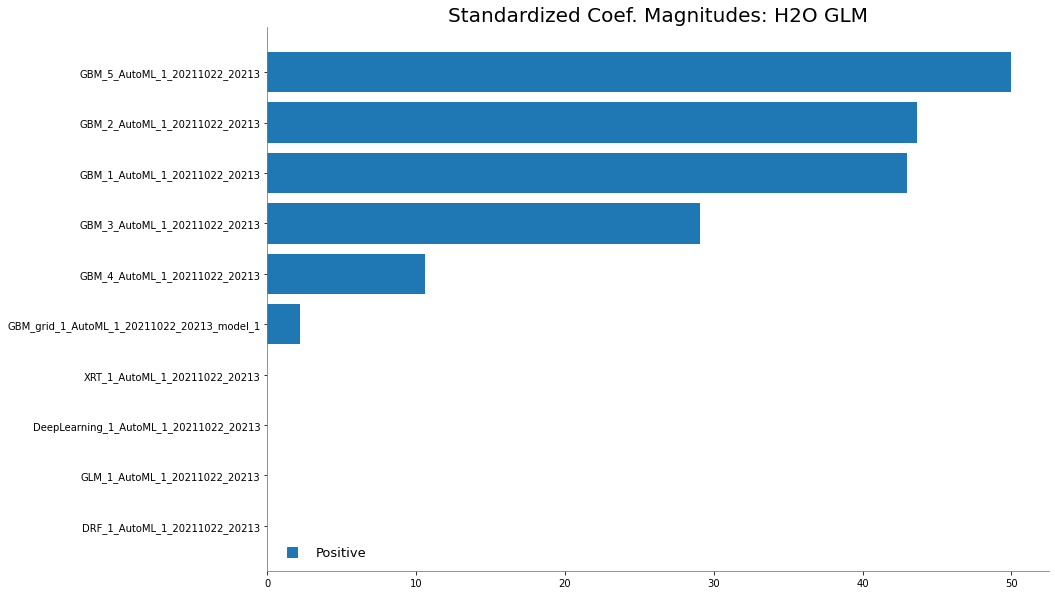

In [34]:
#We can also plot the base learner contributions to the ensemble.
%matplotlib inline
metalearner.std_coef_plot()